# Distinctiveness Centrality by Node or Edge Atrribute
In this tutorial Distinctiveness is calculated multiple times, considering the different values of nodes and edge attributes.

### Installation
    pip install -U distinctiveness

In [1]:
#Import distinctiveness
from distinctiveness.dc import distinctiveness, dc_nodeattribute, dc_edgeattribute

#Import Networkx and Pandas
import networkx as nx
import pandas as pd

from itertools import count
import matplotlib.pyplot as plt

## Undirected Network
Create a toy network with node and edge attributes.

In [2]:
#Create a Toy Network, with edge attributes
G= nx.Graph()
G.add_edge("A","E", weight = 5, temperature = "cold")
G.add_edge("A","B", weight = 2, temperature = "cold")
G.add_edge("B","F", weight = 5, temperature = "hot")
G.add_edge("B","C", weight = 2, temperature = "cold")
G.add_edge("B","D", weight = 2, temperature = "hot")
G.add_edge("C","D", weight = 5, temperature = "hot")

#Add node attributes
G.nodes["A"]["gender"] = "male"
G.nodes["B"]["gender"] = "male"
G.nodes["C"]["gender"] = "male"
G.nodes["D"]["gender"] = "female"
G.nodes["E"]["gender"] = "female"
G.nodes["F"]["gender"] = "female"

print("Nodes:", G.nodes(data=True), "\n")
print("Edges:", G.edges(data=True))

Nodes: [('A', {'gender': 'male'}), ('E', {'gender': 'female'}), ('B', {'gender': 'male'}), ('F', {'gender': 'female'}), ('C', {'gender': 'male'}), ('D', {'gender': 'female'})] 

Edges: [('A', 'E', {'weight': 5, 'temperature': 'cold'}), ('A', 'B', {'weight': 2, 'temperature': 'cold'}), ('B', 'F', {'weight': 5, 'temperature': 'hot'}), ('B', 'C', {'weight': 2, 'temperature': 'cold'}), ('B', 'D', {'weight': 2, 'temperature': 'hot'}), ('C', 'D', {'weight': 5, 'temperature': 'hot'})]


Draw the graph.<br>
*Female: yellow, Male: green, Hot Links: orange, Cold Links: blue.*

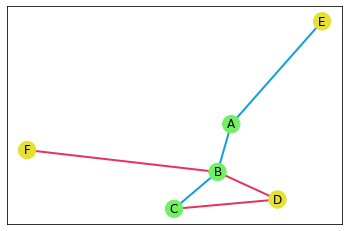

In [3]:
#Define edge colors
colors = {'male':  "#72f065" , 'female': "#e5e033"}
n_colors = [colors[G.nodes[n]['gender']] for n in G.nodes()]

#Define edge colors
colors = {'cold':  "#139edf" , 'hot': "#e5335e"}
e_colors = [colors[G[u][v]['temperature']] for u,v in G.edges()]

#Draw the graph
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), node_color=n_colors,
                 with_labels=True, edge_color = e_colors, width=2)

### Calculate distinctiveness by node attribute (gender)

In [4]:
attname = "gender"
DC_nodeatt = dc_nodeattribute(G, attname, alpha = 1, measures=["D1", "D2", "D3", "D4", "D5"])
DC_nodeatt

,D1_male,D2_male,D3_male,D4_male,D5_male,D1_female,D2_female,D3_female,D4_female,D5_female
A,0.19382,0.09691,0.644439,0.363636,0.25,3.49485,0.69897,6.611096,5.000000,1.0
B,1.59176,0.79588,2.176272,1.142857,1.00,4.29073,1.09691,7.699233,5.571429,1.5
C,0.19382,0.09691,0.644439,0.363636,0.25,1.98970,0.39794,4.225490,3.571429,0.5
D,2.18352,0.49485,4.869929,3.935065,0.75,0.00000,0.00000,0.000000,0.000000,0.0
E,1.98970,0.39794,4.225490,3.571429,0.50,0.00000,0.00000,0.000000,0.000000,0.0
F,0.48455,0.09691,2.385606,2.272727,0.25,0.00000,0.00000,0.000000,0.000000,0.0


### Calculate distinctiveness by edge attribute (temperature)

In [5]:
attname = "temperature"
DC_edgeatt = dc_edgeattribute(G, attname, alpha = 1, measures=["D1", "D2", "D3", "D4", "D5"])
DC_edgeatt

,D1_cold,D2_cold,D3_cold,D4_cold,D5_cold,D1_hot,D2_hot,D3_hot,D4_hot,D5_hot
A,4.29073,1.09691,5.725455,6.000000,1.5,0.00000,0.00000,0.000000,0.000000,0.0
B,2.19382,1.09691,2.260668,2.571429,1.5,4.29073,1.09691,5.997966,5.571429,1.5
C,0.79588,0.39794,0.954243,1.000000,0.5,1.98970,0.39794,3.010300,3.571429,0.5
D,0.00000,0.00000,0.000000,0.000000,0.0,4.29073,1.09691,5.997966,5.571429,1.5
E,1.98970,0.39794,2.385606,3.571429,0.5,0.00000,0.00000,0.000000,0.000000,0.0
F,0.00000,0.00000,0.000000,0.000000,0.0,1.98970,0.39794,3.010300,3.571429,0.5


## Directed Network
Create a directed toy network with node and edge attributes. <br>
*Female: yellow, Male: green, Hot Links: orange, Cold Links: blue.*

Node colors: {'male': '#72f065', 'female': '#e5e033'} ['#72f065', '#e5e033', '#72f065', '#e5e033', '#72f065', '#e5e033']
Edge colors: {'cold': '#139edf', 'hot': '#e5335e'} ['#e5335e', '#139edf', '#e5335e', '#139edf', '#139edf', '#e5335e', '#139edf', '#e5335e']


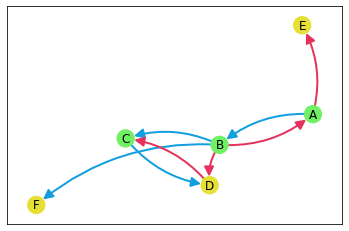

In [6]:
#Or directed toy network
G= nx.DiGraph()
G.add_edge("A","E", weight = 5, temperature = "hot")
G.add_edge("A","B", weight = 6, temperature = "cold")
G.add_edge("B","A", weight = 2, temperature = "hot")
G.add_edge("B","F", weight = 5, temperature = "cold")
G.add_edge("B","C", weight = 2, temperature = "cold")
G.add_edge("B","D", weight = 2, temperature = "hot")
G.add_edge("C","D", weight = 3, temperature = "cold")
G.add_edge("D","C", weight = 5, temperature = "hot")

#Add node attributes
G.nodes["A"]["gender"] = "male"
G.nodes["B"]["gender"] = "male"
G.nodes["C"]["gender"] = "male"
G.nodes["D"]["gender"] = "female"
G.nodes["E"]["gender"] = "female"
G.nodes["F"]["gender"] = "female"

#Define edge colors
colors = {'male':  "#72f065" , 'female': "#e5e033"}
n_colors = [colors[G.nodes[n]['gender']] for n in G.nodes()]
print("Node colors:", colors, n_colors)

#Define edge colors
colors = {'cold':  "#139edf" , 'hot': "#e5335e"}
e_colors = [colors[G[u][v]['temperature']] for u,v in G.edges()]
print("Edge colors:", colors, e_colors)

#Draw the graph
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), node_color=n_colors,
                 connectionstyle='arc3, rad=0.2', arrowsize = 20,
                 with_labels=True, edge_color = e_colors, width=2)

### Calculate distinctiveness by node attribute (gender)

In [7]:
attname = "gender"
DC_nodeatt = dc_nodeattribute(G, attname, alpha = 1, measures=["D1", "D2", "D3", "D4", "D5"])
DC_nodeatt

,D1_in_male,D2_in_male,D3_in_male,D4_in_male,D5_in_male,D1_out_male,D2_out_male,D3_out_male,D4_out_male,D5_out_male,D1_in_female,D2_in_female,D3_in_female,D4_in_female,D5_in_female,D1_out_female,D2_out_female,D3_out_female,D4_out_female,D5_out_female
A,0.19382,0.09691,0.954243,0.363636,0.25,4.19382,0.69897,8.862728,6.000000,1.0,0.00000,0.00000,0.000000,0.0,0.0,3.49485,0.69897,7.385606,5.0,1.0
B,2.38764,0.39794,4.193820,3.272727,0.50,2.19382,1.09691,4.352183,2.571429,1.5,0.00000,0.00000,0.000000,0.0,0.0,4.29073,1.09691,9.135729,5.8,1.5
C,0.19382,0.09691,0.954243,0.363636,0.25,0.00000,0.00000,0.000000,0.000000,0.0,3.49485,0.69897,7.385606,5.0,1.0,1.19382,0.39794,3.000000,1.8,0.5
D,2.29073,0.79588,5.385606,3.363636,1.25,1.98970,0.39794,5.000000,3.571429,0.5,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.00000,0.000000,0.0,0.0
E,1.98970,0.39794,3.160116,2.272727,0.50,0.00000,0.00000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.00000,0.000000,0.0,0.0
F,0.48455,0.09691,3.160116,2.272727,0.25,0.00000,0.00000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.00000,0.000000,0.0,0.0


### Calculate distinctiveness by edge attribute (temperature)

In [8]:
attname = "temperature"
DC_edgeatt = dc_edgeattribute(G, attname, alpha = 1, measures=["D1", "D2", "D3", "D4", "D5"])
DC_edgeatt

,D1_in_cold,D2_in_cold,D3_in_cold,D4_in_cold,D5_in_cold,D1_out_cold,D2_out_cold,D3_out_cold,D4_out_cold,D5_out_cold,D1_in_hot,D2_in_hot,D3_in_hot,D4_in_hot,D5_in_hot,D1_out_hot,D2_out_hot,D3_out_hot,D4_out_hot,D5_out_hot
A,0.00000,0.00000,0.000000,0.000000,0.0,4.19382,0.69897,7.22472,6.0,1.0,0.79588,0.39794,1.338014,1.0,0.5,3.49485,0.69897,5.730640,5.0,1.0
B,4.19382,0.69897,7.224720,6.000000,1.0,4.89279,1.39794,8.42884,7.0,2.0,0.00000,0.00000,0.000000,0.0,0.0,2.79588,1.39794,4.584512,4.0,2.0
C,0.79588,0.39794,0.851937,0.571429,0.5,2.09691,0.69897,3.61236,3.0,1.0,3.49485,0.69897,5.730640,5.0,1.0,0.00000,0.00000,0.000000,0.0,0.0
D,2.09691,0.69897,3.612360,3.000000,1.0,0.00000,0.00000,0.00000,0.0,0.0,0.79588,0.39794,1.338014,1.0,0.5,3.49485,0.69897,5.730640,5.0,1.0
E,0.00000,0.00000,0.000000,0.000000,0.0,0.00000,0.00000,0.00000,0.0,0.0,3.49485,0.69897,5.730640,5.0,1.0,0.00000,0.00000,0.000000,0.0,0.0
F,1.98970,0.39794,3.634994,3.571429,0.5,0.00000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.00000,0.00000,0.000000,0.0,0.0
